In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Wczytanie danych

In [44]:
hypertension_df = pd.read_csv('hypertension_data.csv')

hypertension_df["age_group_13"]=[1.0 if i<30 else 
                                 2.0 if (i>=30)&(i<34) else 
                                 3.0 if (i>=34)&(i<39) else 
                                 4.0 if (i>=39)&(i<44) else 
                                 5.0 if (i>=44)&(i<49) else 
                                 6.0 if (i>=49)&(i<54) else 
                                 7.0 if (i>=54)&(i<59) else 
                                 8.0 if (i>=59)&(i<64) else 
                                 9.0 if (i>=64)&(i<69) else 
                                 10.0 if (i>=69)&(i<74) else 
                                 11.0 if (i>=74)&(i<79) else 
                                 12.0 if (i>=79)&(i<84) else 
                                 13.0 for i in hypertension_df['age']]

hypertension_df["age_group"]=['18 to 29 years' if i<30 else '30 to 44 years' if (i>=30)&(i<45) else 
                                '45 to 59 years' if (i>=45)&(i<59) else '60 and over' for i in hypertension_df['age']]

hypertension_df.pop('age')
hypertension_df.head()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group_13,age_group
0,1.0,3,145,233,1,0,150,0,2.3,0,0,1,1,7.0,45 to 59 years
1,0.0,2,130,250,0,1,187,0,3.5,0,0,2,1,9.0,60 and over
2,1.0,1,130,204,0,0,172,0,1.4,2,0,2,1,6.0,45 to 59 years
3,0.0,1,120,236,0,1,178,0,0.8,2,0,2,1,7.0,45 to 59 years
4,0.0,0,120,354,0,1,163,1,0.6,2,0,2,1,9.0,60 and over


In [45]:
hypertension_df.shape

(26083, 15)

In [46]:
# Podział kolumn na numeryczne i binarne
hypertension_binary_features = [col for col in hypertension_df if np.isin(hypertension_df[col].dropna().unique(), [0, 1]).all()]
hypertension_numerical_features = list(hypertension_df.drop(hypertension_binary_features, axis=1).columns)

In [47]:
hypertension_binary_features

['sex', 'fbs', 'exang', 'target']

In [48]:
hypertension_numerical_features

['cp',
 'trestbps',
 'chol',
 'restecg',
 'thalach',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'age_group_13',
 'age_group']

# Podstawowe informacje

In [49]:
hypertension_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26083 entries, 0 to 26082
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sex           26058 non-null  float64
 1   cp            26083 non-null  int64  
 2   trestbps      26083 non-null  int64  
 3   chol          26083 non-null  int64  
 4   fbs           26083 non-null  int64  
 5   restecg       26083 non-null  int64  
 6   thalach       26083 non-null  int64  
 7   exang         26083 non-null  int64  
 8   oldpeak       26083 non-null  float64
 9   slope         26083 non-null  int64  
 10  ca            26083 non-null  int64  
 11  thal          26083 non-null  int64  
 12  target        26083 non-null  int64  
 13  age_group_13  26083 non-null  float64
 14  age_group     26083 non-null  object 
dtypes: float64(3), int64(11), object(1)
memory usage: 3.0+ MB


In [50]:
hypertension_df.describe()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group_13
count,26058.00000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000
mean,0.50000,0.958594,131.592992,246.246061,0.149753,0.526512,149.655024,0.326573,1.039512,1.400299,0.721849,2.318752,0.547253,6.929341
std,0.50001,1.023931,17.588809,51.643522,0.356836,0.525641,22.858109,0.468969,1.165138,0.616513,1.011608,0.604659,0.497772,3.031079
min,0.00000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.00000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,5.000000
50%,0.50000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,7.000000
75%,1.00000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,9.000000
max,1.00000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,13.000000


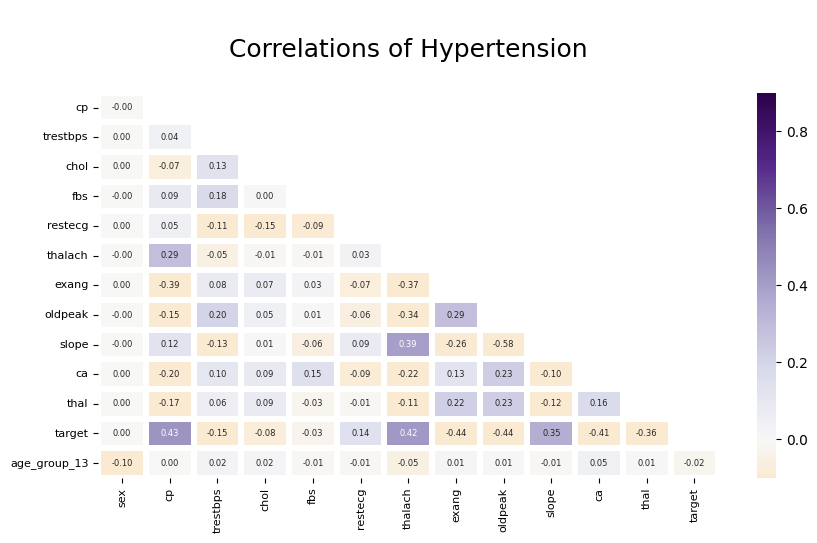

In [51]:
# Macierz korelacji
fig, ax = plt.subplots(figsize=(10,5))   

mask = np.triu(np.ones_like(hypertension_df.corr(numeric_only = True), dtype=bool))[1:, :-1]
corr = hypertension_df.corr(numeric_only = True).iloc[1:,:-1].copy()

ax = sns.heatmap(corr, mask=mask, vmin=-.1, vmax=.9, center=0, annot=True, fmt='.2f', 
               cmap ='PuOr', linewidths=4, annot_kws={"fontsize":6})

ax.set_title('\nCorrelations of Hypertension\n', fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=8)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)
plt.show()

# Fiolet - wartości dodatnie, Biały - zero, Pomarańcz - wartości ujemne

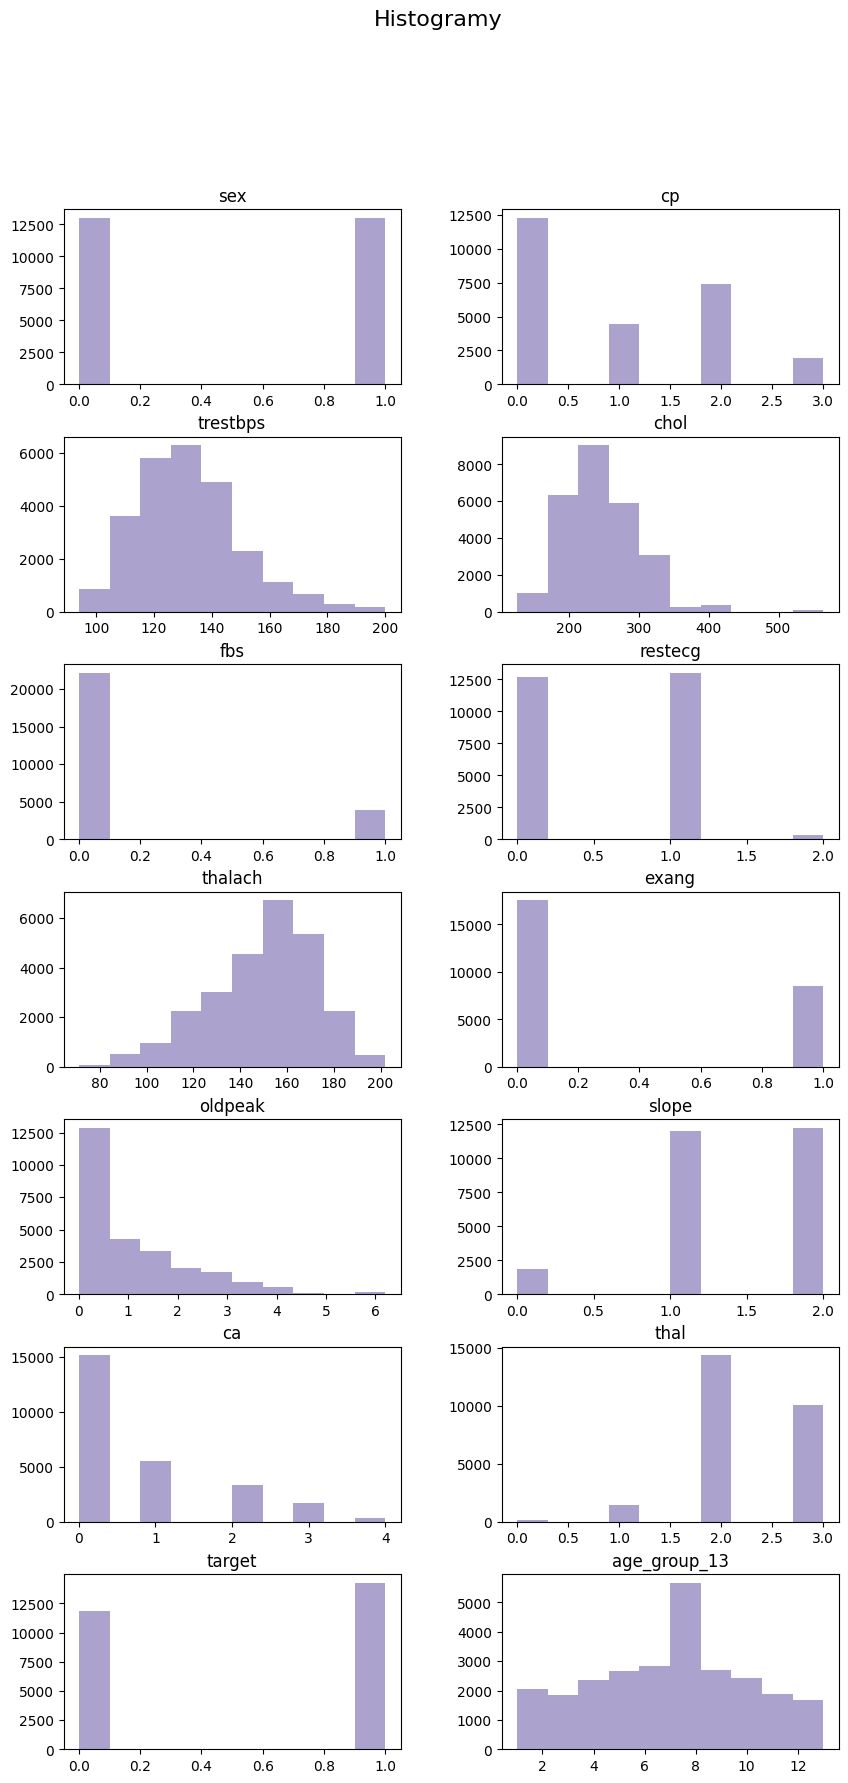

In [52]:
# Rozkład wszystkich cech
fig2, axis2 = plt.subplots(7, 2, figsize=(10,20))
fig2.suptitle('Histogramy', fontsize=16)
hypertension_df.hist(grid = False, ax = axis2, color = '#aba3cd')
plt.show()

In [56]:
print(hypertension_binary_features)
print(hypertension_numerical_features)

['sex', 'fbs', 'exang', 'target']
['cp', 'trestbps', 'chol', 'restecg', 'thalach', 'oldpeak', 'slope', 'ca', 'thal', 'age_group_13', 'age_group']


# Ciekawe wykresy

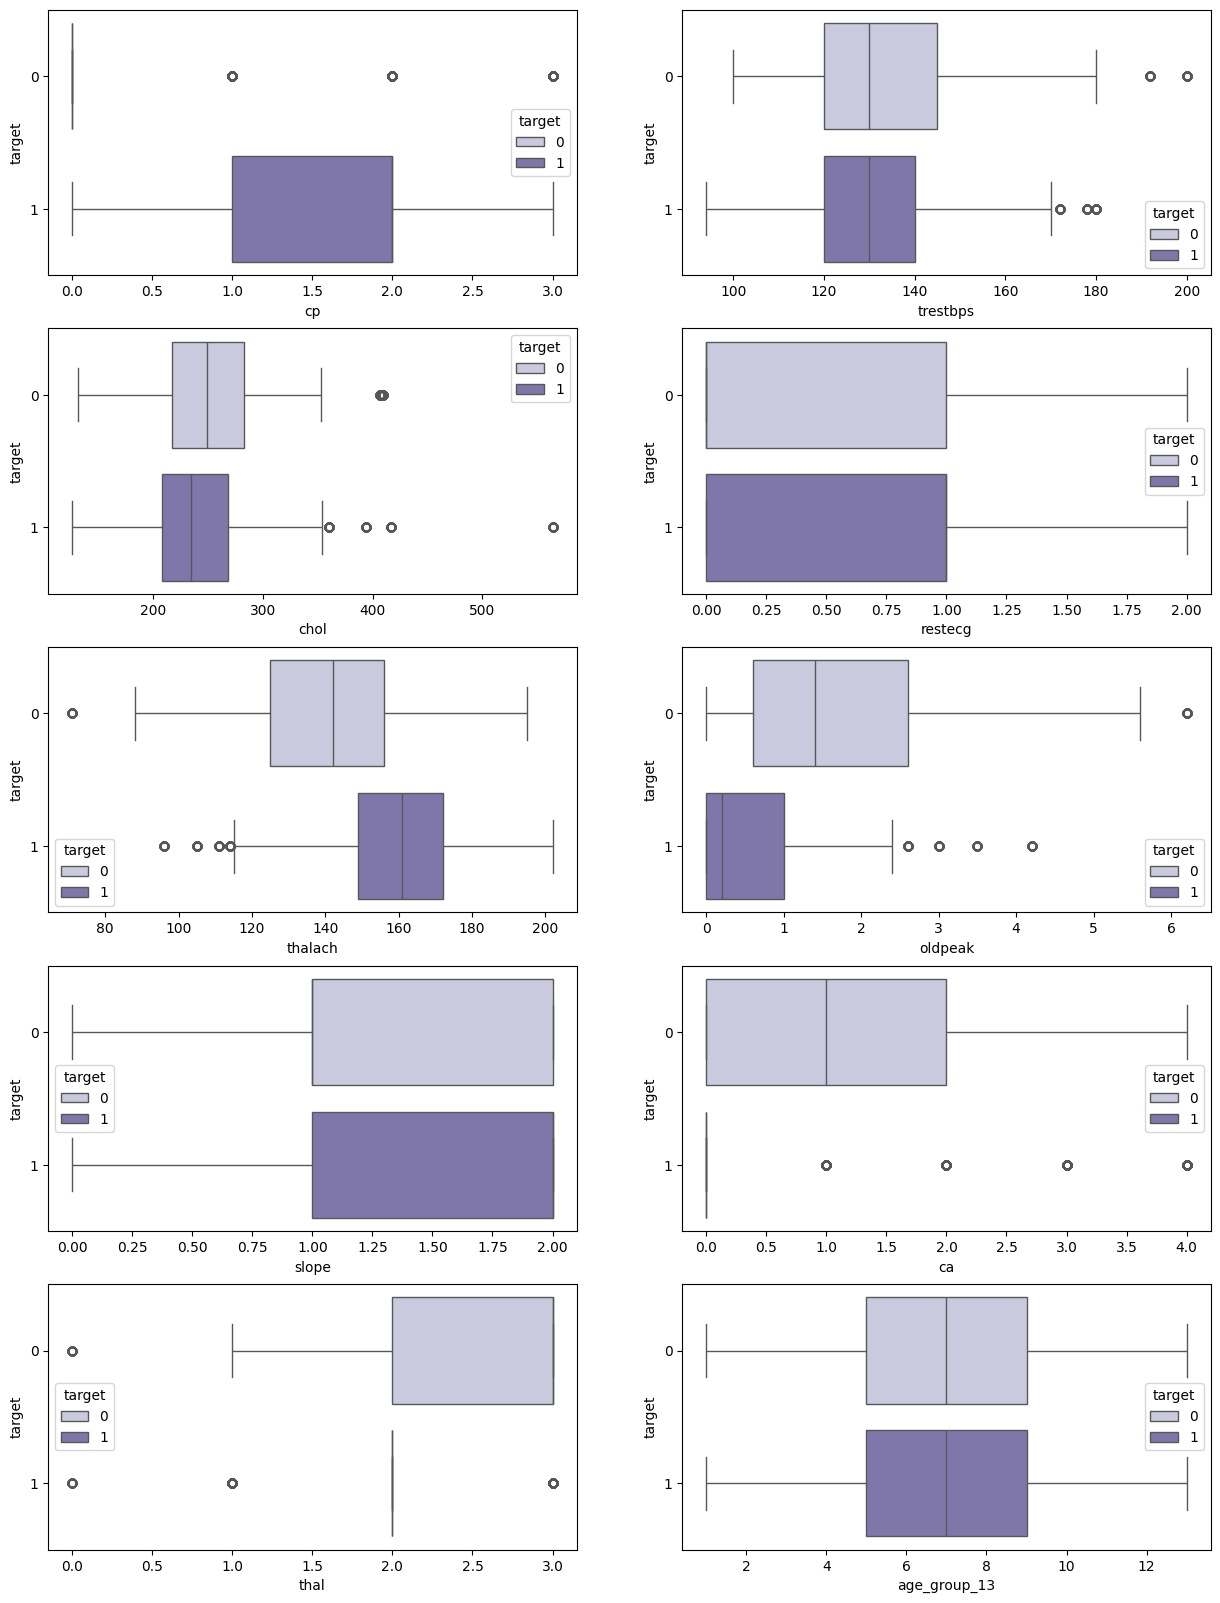

In [60]:
binary = hypertension_binary_features[-1]
i = 0
fig, axes = plt.subplots(5, 2, figsize=(15,20))
axes = axes.flatten()
for feature in hypertension_numerical_features[:-1]:
    sns.boxplot(x = hypertension_df[feature], y = hypertension_df[binary], hue = hypertension_df[binary], orient="h", palette='Purples', ax=axes[i])
    i += 1
plt.show()

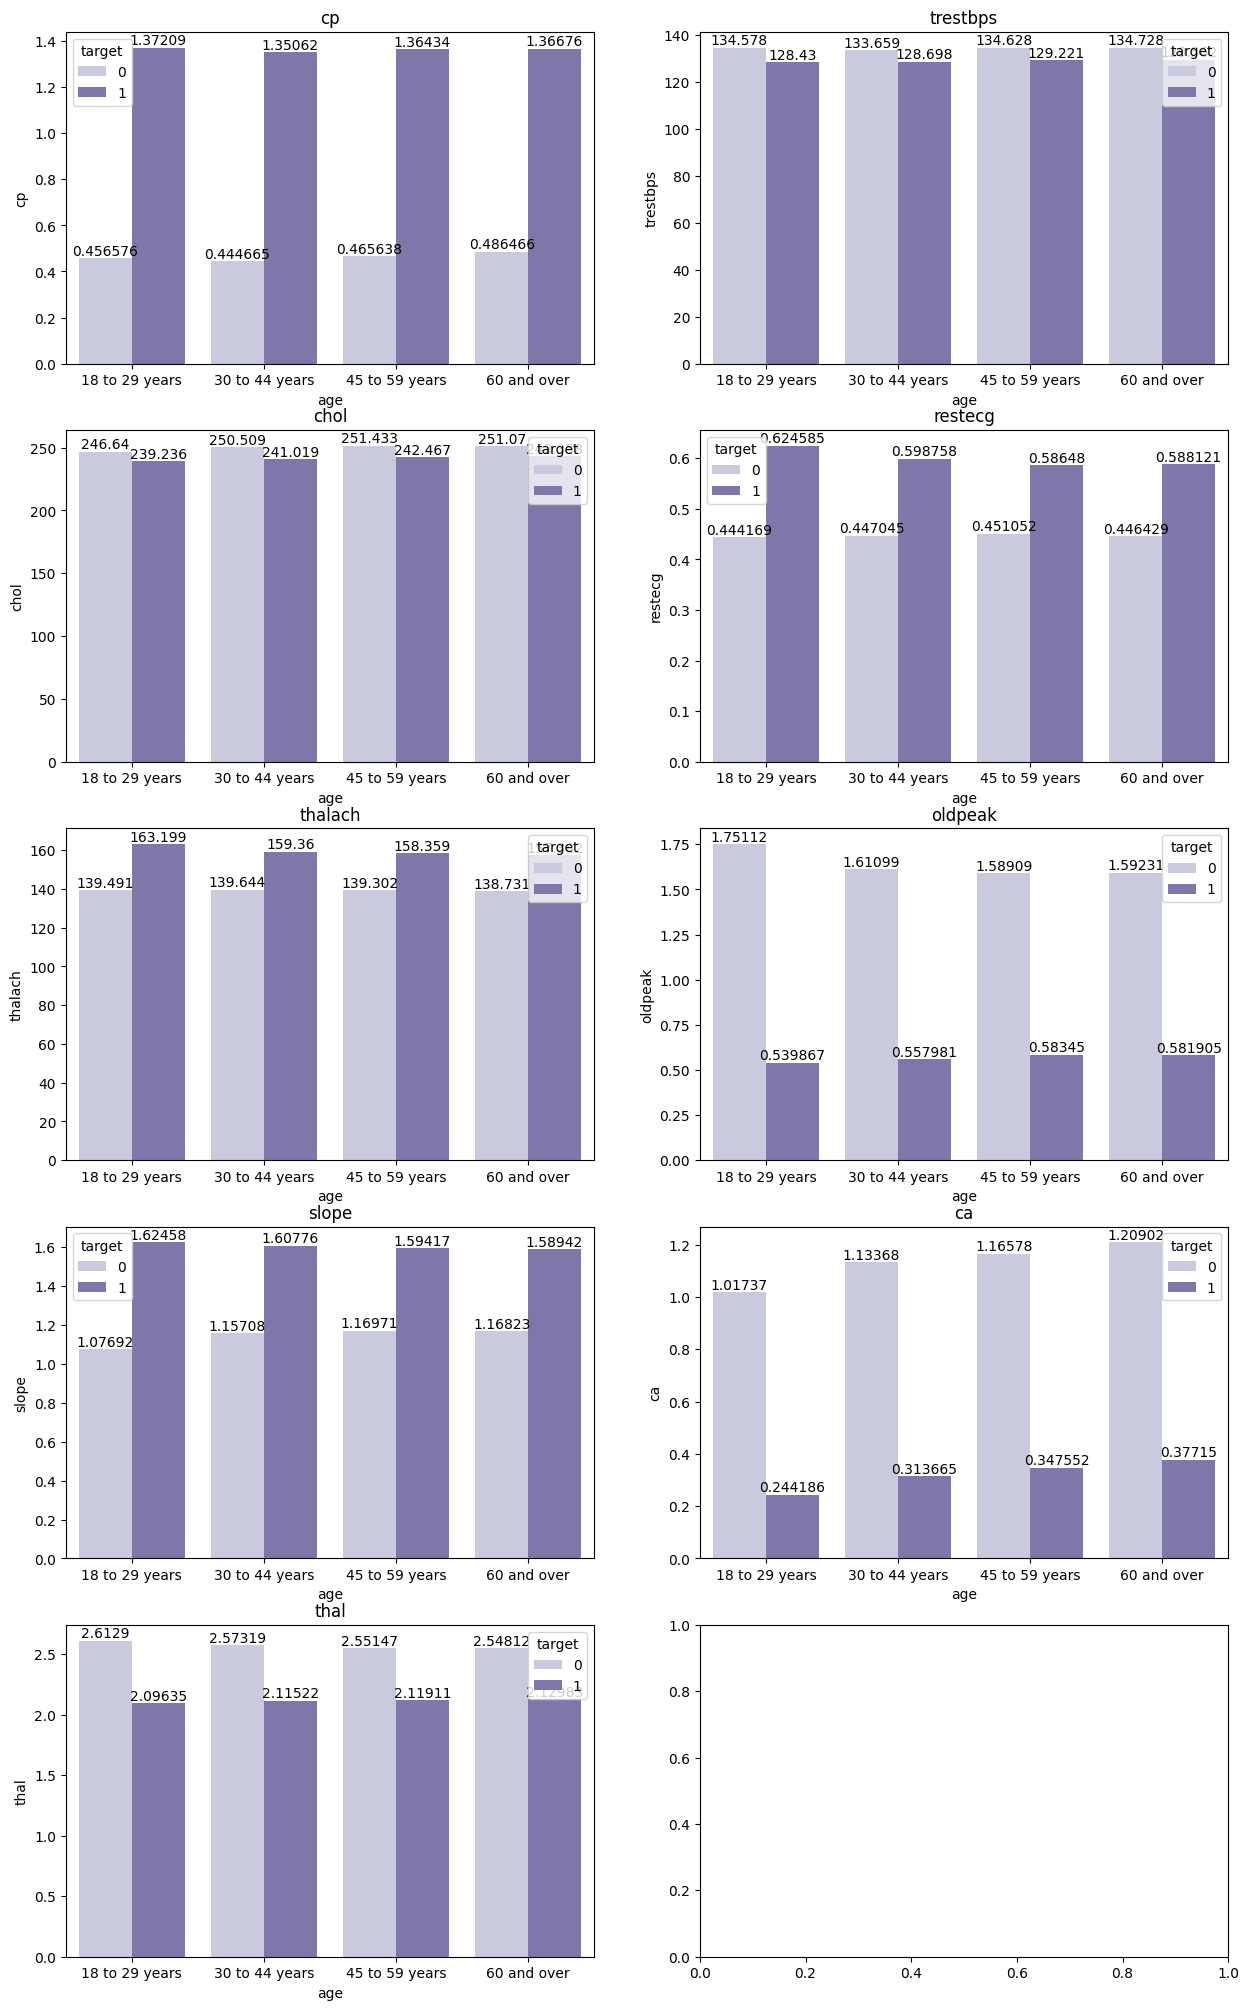

In [26]:
binary = hypertension_binary_features[-1]

k = 0
fig, axes = plt.subplots(5, 2, figsize=(15,25))
axes = axes.flatten()

for feature in hypertension_numerical_features[1:]:

    plot_df = hypertension_df.copy()

    plot_df["age"]=['18 to 29 years' if i<30 else '30 to 44 years' if (i>=30)&(i<45) else 
                      '45 to 59 years' if (i>=45)&(i<59) else '60 and over' for i in hypertension_df['age']]

    plot_df = plot_df.groupby(['age', binary])[feature].mean()
    plot_df = plot_df.rename(feature).reset_index().sort_values(binary, ascending=True)

    ax = sns.barplot(x="age", y=feature, hue = binary, palette="Purples", data=plot_df, ax=axes[k])

    for i in ax.containers:
        ax.bar_label(i,)
        
    axes[k].title.set_text(feature)
    k += 1
    
plt.show()

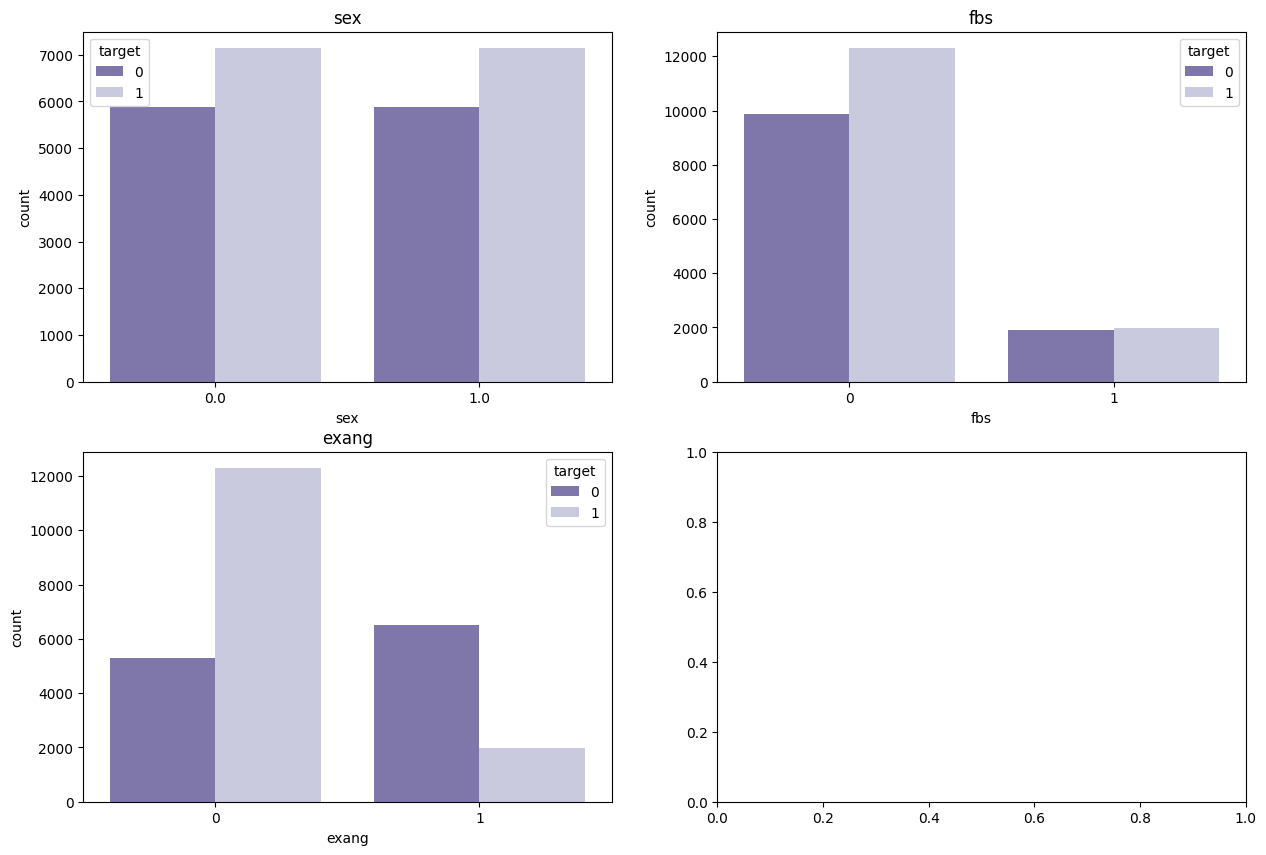

In [64]:
k = 0
fig, axes = plt.subplots(2, 2, figsize=(15,10))
axes = axes.flatten()

for feature in hypertension_binary_features[:-1]:
    plt
    sns.countplot(x=feature, hue='target', palette="Purples_r", data=hypertension_df, ax=axes[k])
    for i in ax.containers:
        ax.bar_label(i,)
        
    axes[k].title.set_text(feature)
    k += 1
    
plt.show()